In [1]:
from __future__ import print_function

import numpy as np
import seaborn as sbn
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import scipy.optimize
import scipy.io

from mpl_toolkits.mplot3d import Axes3D

plt.style.use('classic')
mpl.rcParams['axes.xmargin'] = 0.0
mpl.rcParams['axes.ymargin'] = 0.0

%matplotlib inline

In [45]:
data = scipy.io.loadmat ('ex3data1.mat')
X = data['X']
y = data['y']
y[y==10] = 0

(-0.5, 399.5, 19.5, -0.5)

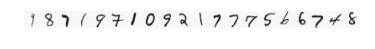

In [46]:
sel = np.random.choice (len (X), size=20)
plt.figure ()
plt.imshow (X[sel].reshape (-1, 20).T, cmap='Greys')
plt.axis ('off')

In [47]:
def sigmoid (z):
    return (1. / (1. + np.exp (-z)))

def gradient (theta, X, y, lambda_reg):
    m = len (y)
    theta = theta.reshape((X.shape[1], 1))
    h_theta = sigmoid (X.dot (theta))
    grad = 1./m * (h_theta - y).T.dot (X)
    grad[:, 1:] += lambda_reg/m * theta.T[:, 1:]
    return (grad.flatten ())

def lrCostFunction (theta, X, y, lambda_reg):
    m = len (y)
    theta = theta.reshape((X.shape[1], 1))
    h_theta = sigmoid (X.dot (theta))
    J = -1./m * (y.T.dot (np.log (h_theta)) + 
                 (1 - y).T.dot (np.log (1 - h_theta))) + \
            lambda_reg/(2.*m) * theta.T.dot (theta)
        
    return (J)

In [51]:
def oneVsAll (X, y, num_labels, lambda_reg):
    m = X.shape[0]
    n = X.shape[1]
    
    all_theta = np.zeros ((num_labels, n+1))
    
    X = np.hstack ((np.ones((m, 1)), X))
    
    for c in range (num_labels):
        initial_theta = np.zeros (n+1)
        result = scipy.optimize.minimize (
            fun=lrCostFunction, x0=initial_theta, 
            args=(X, (y == c), lambda_reg), method='BFGS', 
            jac=gradient, 
            options=dict(maxiter=100, disp=True))
        
        all_theta[c] = result.x
        
    return all_theta

def predictOneVsAll (all_theta, X):
    m = X.shape[0]
    n = X.shape[1]
    
    X = np.hstack ((np.ones((m, 1)), X))
    
    prob = X.dot (all_theta.T)
    pred = np.argmax (prob, axis=1).reshape (m, 1)
    return (pred)    

In [52]:
num_labels = 10
lambda_reg = 0.1

all_theta = oneVsAll (X, y, num_labels, lambda_reg)

         Current function value: 0.011784
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105
         Current function value: 0.015540
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
         Current function value: 0.057863
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
         Current function value: 0.064206
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
         Current function value: 0.039404
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
         Current function value: 0.062651
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
         Current function value: 0.023858
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
         Current function value: 0.036249

In [53]:
p = predictOneVsAll (all_theta, X)
print ('Train Accuracy: {0:.2f}%'.format (100. / len (y) * (p == y).sum ()))

Train Accuracy: 94.98%


In [69]:
data = scipy.io.loadmat ('ex3data1.mat')
X = data['X']
y = data['y'] - 1  # Get python and MATLAB indexing to match given the definitions of Theta

weights = scipy.io.loadmat ('ex3weights.mat')
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

m = X.shape[0]

In [70]:
def predictNN (Theta1, Theta2, X):
    m = X.shape[0]
    num_labels = Theta2.shape[0]
    
    X = np.hstack ((np.ones ((m, 1)), X))
    
    z2 = X.dot (Theta1.T)
    a2 = sigmoid (z2)
    
    a2 = np.hstack ((np.ones ((m, 1)), a2))
    z3 = a2.dot (Theta2.T)
    prob = sigmoid (z3)
    
    return (np.argmax (prob, axis=1).reshape (m, 1))

In [71]:
p = predictNN (Theta1, Theta2, X)
print ('Train Accuracy: {0:.2f}%'.format (100. / len (y) * (p == y).sum ()))

Train Accuracy: 97.52%
